In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sca_evolve(plut: np.ndarray, x: np.ndarray) -> np.ndarray:
  probs = plut[7 - (np.roll(x, 1) * 4 + x * 2 + np.roll(x, -1))]
  rnd = np.random.random(size=probs.shape)
  return (rnd<probs).astype(np.int8)

def sca_evolve_spacetime(plut: np.ndarray, initial_conf: np.ndarray, steps: int) -> np.ndarray:
    rows = [initial_conf]
    for _ in range(1, steps):
        rows.append(sca_evolve(plut, rows[-1]))
    return np.stack(rows)  

def sca_space_time(plut: np.ndarray, initial_conf: np.ndarray, steps: int):
    spacetime = sca_evolve_spacetime(plut, initial_conf, steps)
    plt.figure(figsize=(5, 5))
    plt.imshow(spacetime, cmap='binary', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()

0.85


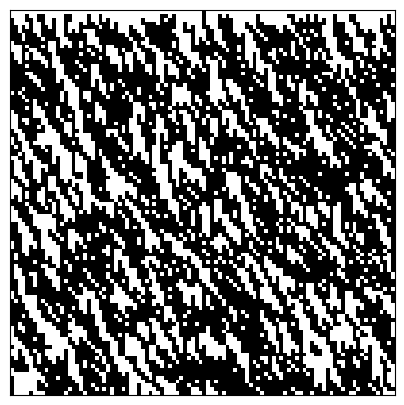

0.87


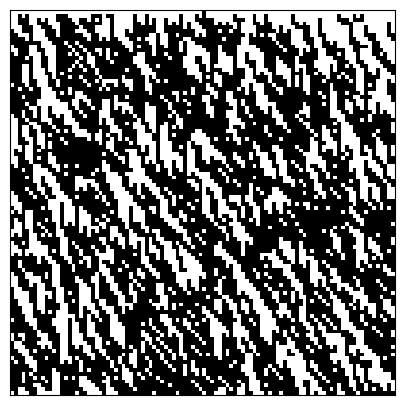

0.9


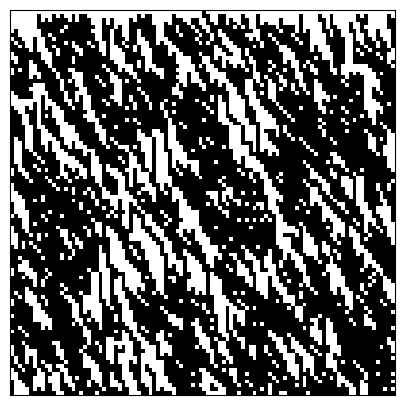

0.93


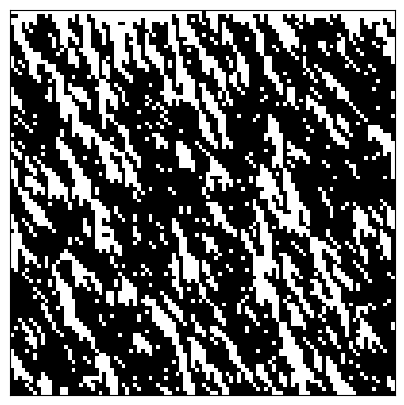

0.95


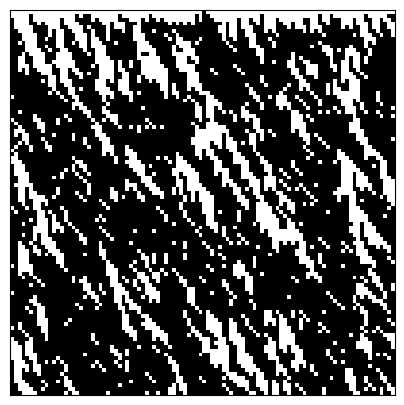

0.97


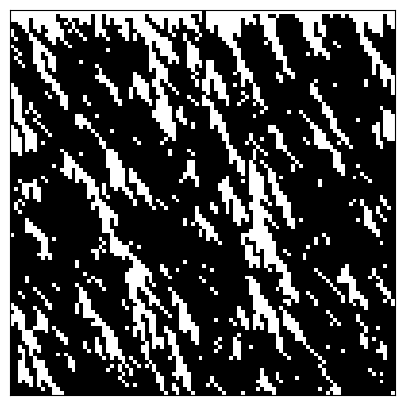

0.99


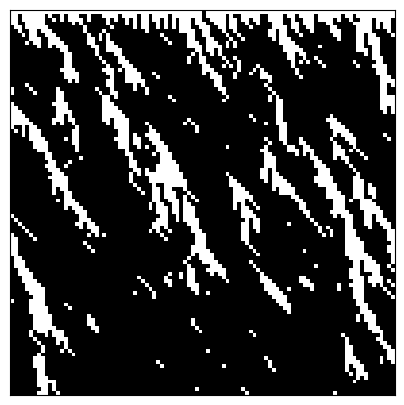

In [3]:
conf = np.zeros(100,dtype=np.int8)
conf[50] = 1

for p in [0.85, 0.87, 0.9, 0.93, 0.95, 0.97, 0.99]:
    print(p)
    sca_space_time(np.array([p, 0.9, 0.75, 0.4, 0.5, 1, 0, 0.2]), conf, 100)

In [4]:
def bin2dec(x):
    pows = [128,64,32,16,8,4,2,1]
    return sum([pows[i]*x[i] for i in range(8)])

ecas = [[1,1,1,0,0,1,0,0], [1,1,0,1,1,1,0,0], [1,1,1,1,1,1,0,1], [1,0,1,0,1,1,0,0], [1,0,1,0,1,1,0,1]]
for eca in ecas:
    print(bin2dec(eca))

228
220
253
172
173


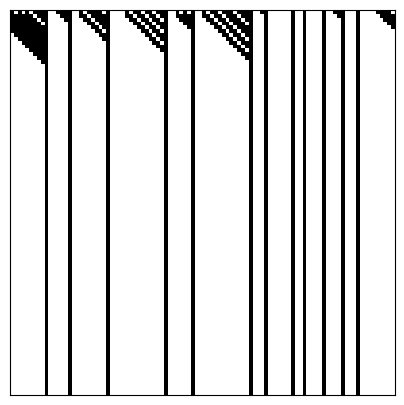

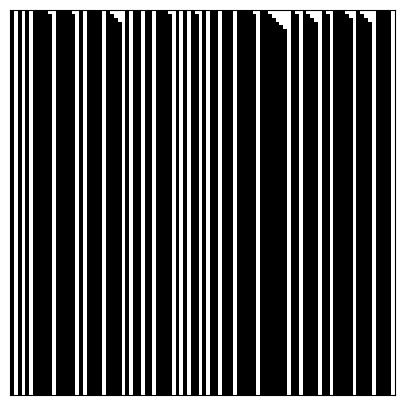

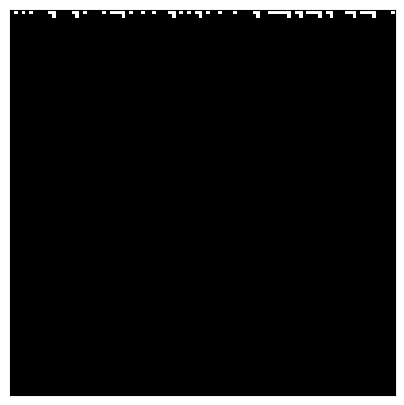

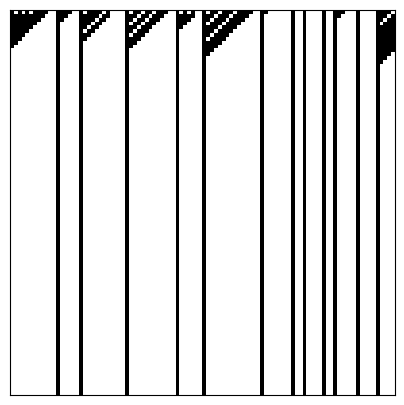

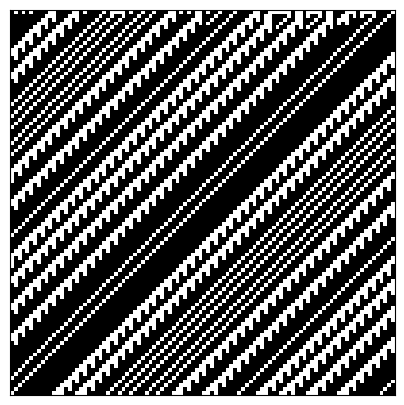

In [5]:
ecas = [ np.array([1,1,1,0,0,1,0,0]), np.array([1,1,0,1,1,1,0,0]), np.array([1,1,1,1,1,1,0,1]), np.array([1,0,1,0,1,1,0,0]), np.array([1,0,1,0,1,1,0,1])]

conf = np.random.randint(0,2,size=100,dtype=np.int8)

for eca in ecas:
    sca_space_time(eca, conf, 100)
 

1.0


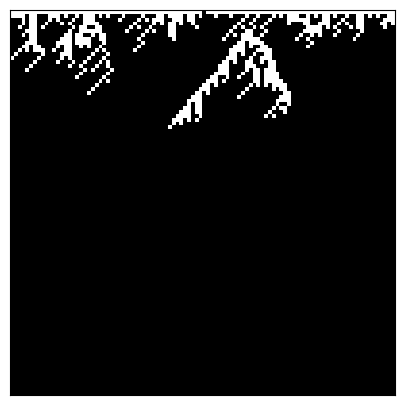

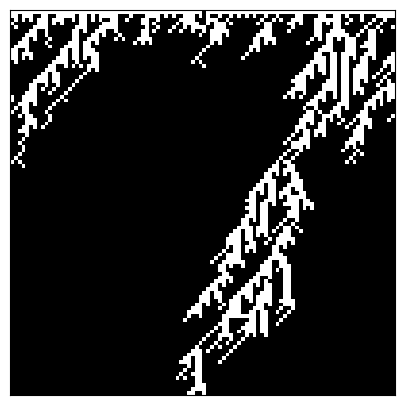

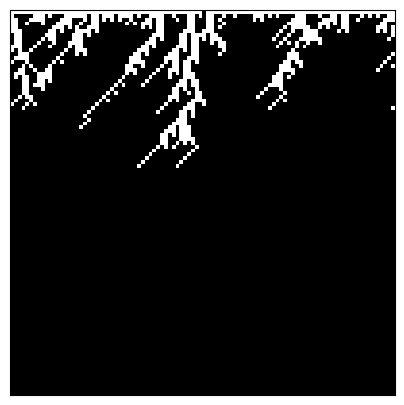

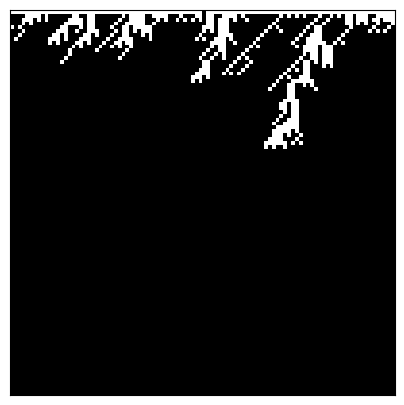

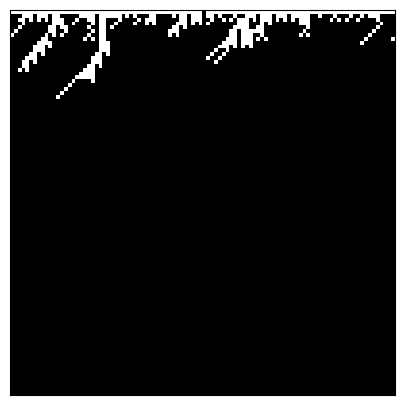

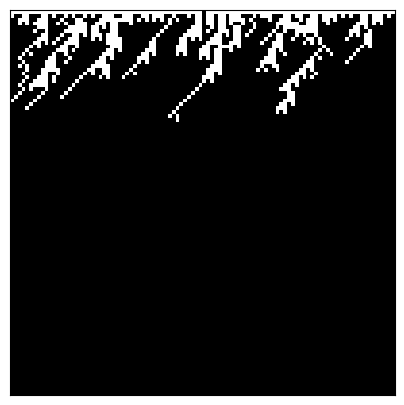

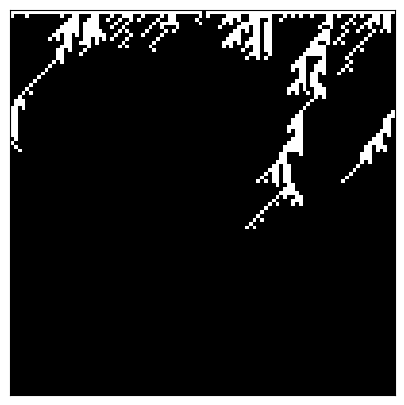

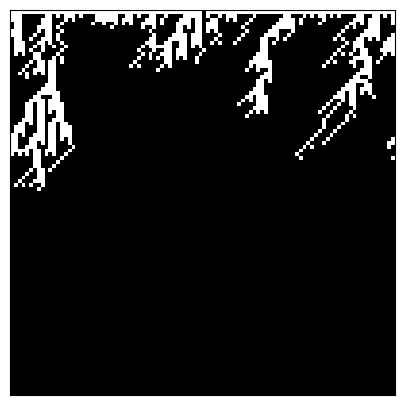

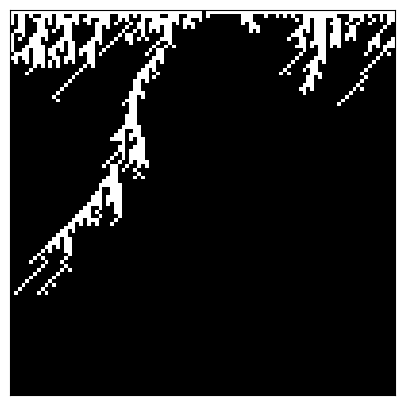

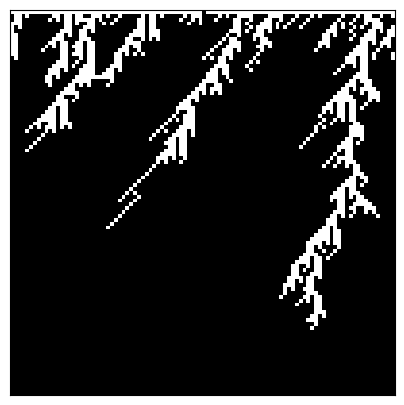

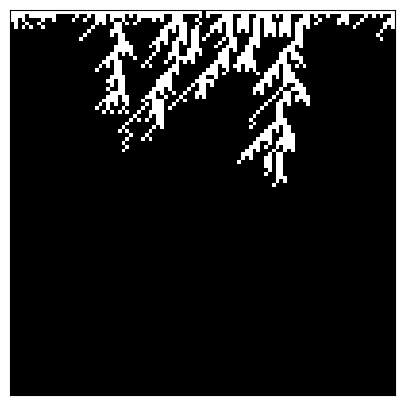

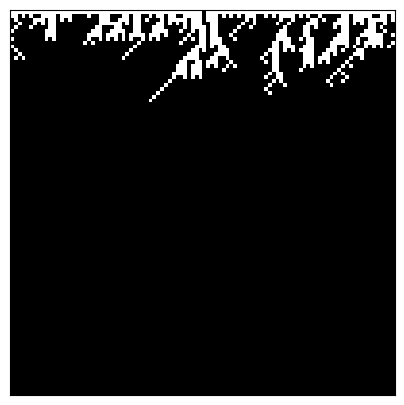

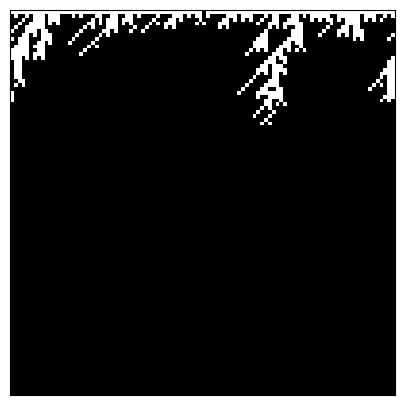

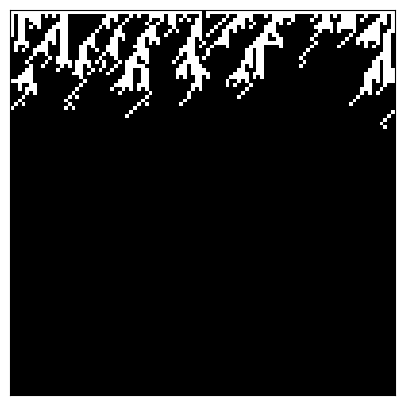

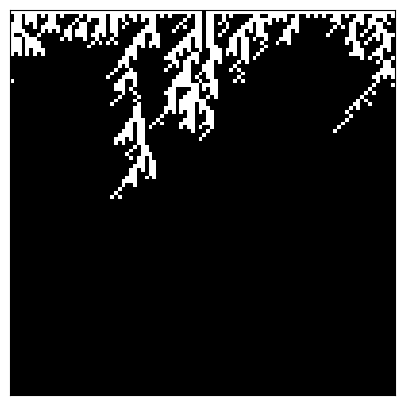

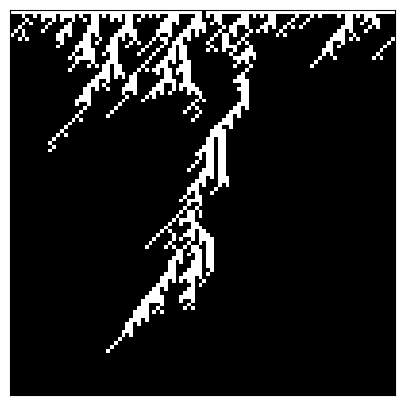

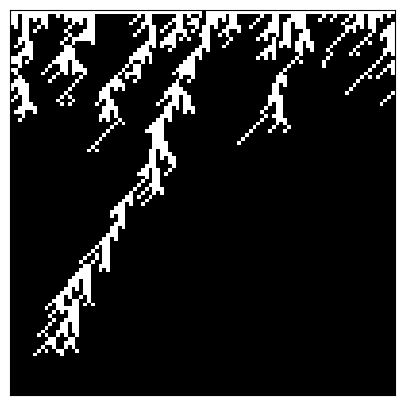

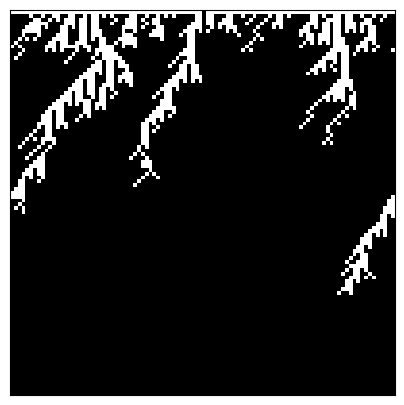

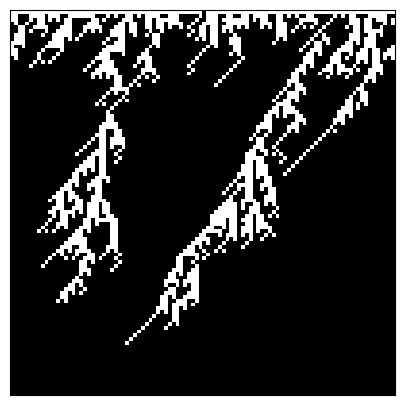

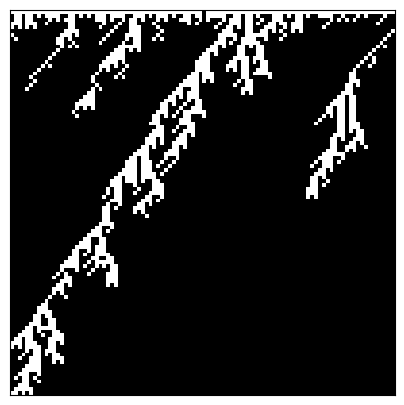

In [6]:
ecas = [np.array([1,1,1,0,0,1,0,0]), np.array([1,1,0,1,1,1,0,0]), np.array([1,1,1,1,1,1,0,1]), np.array([1,0,1,0,1,1,0,0]), np.array([1,0,1,0,1,1,0,1])]
probs = [0.2, 0.05, 0.05, 0.25, 0.45]
sca =  np.array([0.0]*8)

print(sum(probs))
for i in range(5):
    sca += probs[i]*ecas[i]
    
conf = np.zeros(100,dtype=np.int8)
conf[50] = 1

for _ in range(20):
    sca_space_time(sca, conf, 100)